## Importing Necessary Libraries

In [61]:
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the data

In [32]:
data =pd.read_csv("Twitter.csv")

### Data Preview 

In [62]:
data

,text,label
1,is so fun to play with in pic twitter com,1.0
2,nothing really worth getting after at launch ...,-1.0
3,you re awesome hope you know that let s sp...,0.0
4,by and this is why vaccines cannot be rushed ...,0.0
5,i started playing overwatch again after a year...,1.0
...,...,...
74674,lol the answer,-1.0
74676,imagine complaining about realistic body prop...,1.0
74677,borderlands echo cast doesn t work for me t...,-1.0
74678,battlefield is being revamped and can t wait ...,1.0


In [33]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [34]:
data.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [35]:
data.shape

(74681, 4)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [37]:
data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [38]:
data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


# Noramalization

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Twitter.csv")

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(74681, 4)

************************************************************


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,0.181832,Borderlands,Positive,I am coming to the borders and I will kill you...
1,0.181832,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,0.181832,Borderlands,Positive,im coming on borderlands and i will murder you...
3,0.181832,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,0.181832,Borderlands,Positive,im getting into borderlands and i can murder y...


## Data Preprocessing

### Assigning Column Names

In [40]:
data.columns = ["id", "information", "sentiment", "text"]

In [41]:
data.columns

Index(['id', 'information', 'sentiment', 'text'], dtype='object')

### Create a new Column("Label")
#### (Negative = -1,  Nuetral = 0,  Positive = 1)

In [42]:
def label(sentiment):
    if sentiment == "Negative":
        return -1
    elif sentiment == "Neutral":
        return 0
    elif sentiment == "Positive":
        return 1

In [43]:
data['label'] = data['sentiment'].apply(label)

In [44]:
data.head()

,id,information,sentiment,text,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1.0
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,1.0


### 'id', 'information' and 'sentiment' columns are not required for analysis, So drop these Columns.

In [45]:
data = data.drop(['id', 'information', 'sentiment'], axis = 1)

### Shuffling the Data Randomly

In [46]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [47]:
data.head()

,text,label
0,oh you play gta? fortnite? call of duty? that’...,NaN
1,@StephenCurry30 is so fun to play with in @NBA...,1.0
2,Nothing really worth getting after ps5 at laun...,-1.0
3,"You're awesome, hope you know that!. Let'8 s s...",0.0
4,by And this is why vaccines cannot be rushed. ...,0.0


### Checking Null values and Dropping the Row with Null Value.

In [48]:
data.isnull().sum()

text       686
label    12990
dtype: int64

In [49]:
data = data.dropna(axis=0, how="any", subset=None, inplace=False)

In [50]:
data.isnull().sum()

text     0
label    0
dtype: int64

## Visualizing Data

### Distibution of Labels
#### Negative = -1, Neutral = 0, Positive = 1

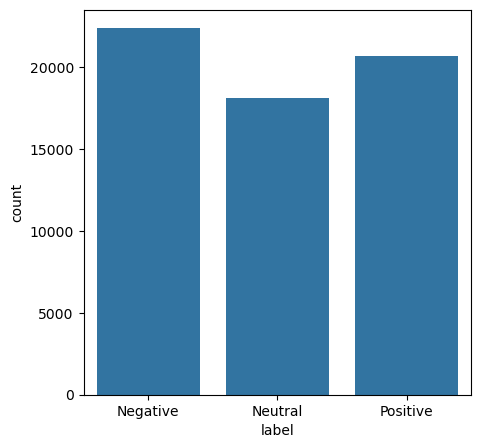

In [51]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = data)
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

## Text Preprocessing

In [52]:
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]','',text)  # Using raw string here
    text = re.sub(r"\W", " ", text)   # Using raw string here
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Using raw string here
    text = re.sub(r'<.*?>+', '', text)  # Using raw string here
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Using raw string here
    text = re.sub(r'\w*\d\w*', '', text)  # Using raw string here
    return text

In [53]:
data['text'] = data['text'].apply(preprocessing)

In [54]:
print(data["text"].iloc[0], "\n")
print(data["text"].iloc[15], "\n")
print(data["text"].iloc[49], "\n")
print(data["text"].iloc[2000], "\n")
print(data["text"].iloc[56000], "\n")

  is so fun to play with in     pic twitter com  

i still buy nba  almost every year because i really like basketball and hate myself for it lmao 

i tried out hearthstone battlegrounds and plummeted right past the elo  year olds hang out until i started getting top  vs the  year olds    

love  

battlefield  had a good dlc model 



### Defining dependent and independent variable as x and y.

In [55]:
x = data['text'].values
y = data['label'].values

### Convert text to vectors.

In [56]:
vectorizer = CountVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)

## Training the model

### Splitting the dataset into training set and testing set. 

In [57]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

## Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Abdul Haseeb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

## Accuracy Score

In [35]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9138784358638743


## Evaluation

In [36]:
def predict_sentiment(text):
    cleaned_text = preprocessing(text)
    text_vec = vectorizer.transform([cleaned_text])
    sentiment = model.predict(text_vec)[0]

    if(sentiment == -1):
        return 'Negative'
    elif(sentiment == 0):
        return 'Neutral'
    elif(sentiment == 1):
        return 'Positive'

## Input

In [37]:
new_texts = [
    "welcome to free the jungle",
    "I really enjoyed this!", 
    "Not worth the money.", 
    "Exceptional quality!"
]

## Output

In [38]:
for text in new_texts:
    print(f"Text: {text} | Sentiment: {predict_sentiment(text)}")

Text: welcome to free the jungle | Sentiment: Neutral
Text: I really enjoyed this! | Sentiment: Positive
Text: Not worth the money. | Sentiment: Negative
Text: Exceptional quality! | Sentiment: Positive
